In [1]:
# %matplotlib widget

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from data_io import read_iq_data
from visualisation import PDRPlotter, load_and_plot_pkl_data
from interference_utils import pdr_vs_snr_analysis_parallel
from receiver import ReceiverType, DemodulationType
from demodulation import TEDType

# IEEE 802.15.4 example

In [2]:
fs = 10e6  # Hz
folder = "data_pdr"
filenames: dict = {"BLE": "BLE_0dBm.dat", "IEEE802154": "802154_0dBm.dat"}  # Open BLE file
receiver_type: ReceiverType = "IEEE802154"
signal_present = (4000, 14000) if receiver_type == "BLE" else (8000, 35000)
iq_samples: np.ndarray = read_iq_data(f"../../capture_nRF/data/new/{filenames[receiver_type]}")

demodulation_type: DemodulationType = "INSTANTANEOUS_FREQUENCY"
ted_types: list[TEDType] = [
    "MOD_MUELLER_AND_MULLER",
]
snr_range = range(-4, 6, 1)
noise_realisations = int(1e4)

In [3]:
pdr = []

for ted in ted_types:
    result = pdr_vs_snr_analysis_parallel(
        iq_samples=iq_samples,
        snr_range=snr_range,
        sample_interval=signal_present,
        fs=fs,
        receiver_type=receiver_type,
        demodulation_type=demodulation_type,
        ted_type=ted,
        noise_realisations=noise_realisations,
    )
    pdr.append(result)
    filename = f"{folder}/{receiver_type}_before_simple_squelch_{ted}.pkl"
    with open(filename, "wb") as file:
        pickle.dump(result, file)

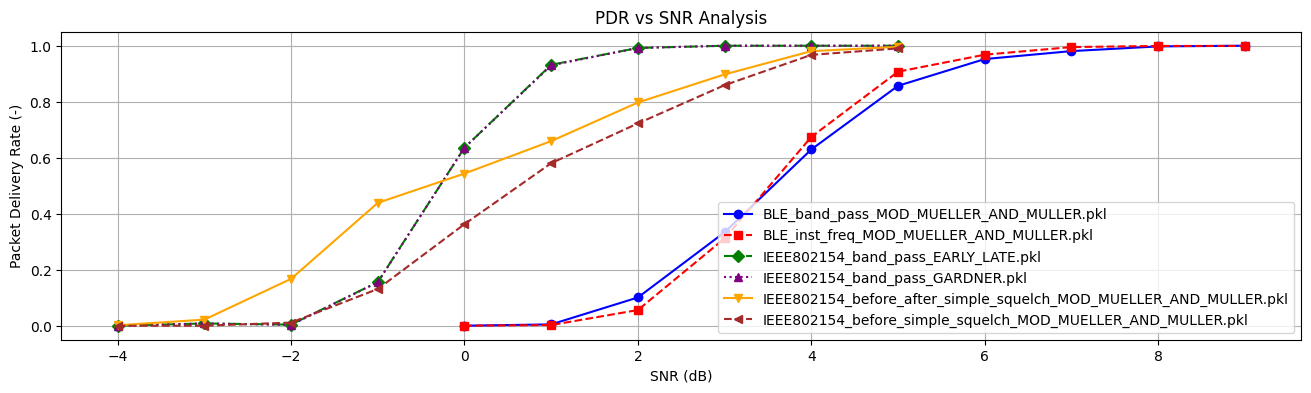

In [10]:
load_and_plot_pkl_data(figsize=(16, 4))